<a href="https://colab.research.google.com/github/MagnusRedkin/Netology/blob/main/DZ_%C2%AB%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%9D%D0%A1%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка

In [ ]:
# Работа с массивами данных
import numpy as np

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# модуль для разбиения данных на обучающую и тестовую выборкиfrom sklearn.model_selection import train_test_split

# Основные слои
from tensorflow.keras.layers import Input, Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

# Рисование схемы модели
from tensorflow.keras.utils import plot_model

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Вывод объектов в ячейке colab
from IPython.display import display

%matplotlib inline

In [ ]:
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/writers.zip', None, quiet=True)
!unzip -o writers.zip -d writers/

Archive:  writers.zip
  inflating: writers/(Клиффорд_Саймак) Обучающая_5 вместе.txt  
  inflating: writers/(Клиффорд_Саймак) Тестовая_2 вместе.txt  
  inflating: writers/(Макс Фрай) Обучающая_5 вместе.txt  
  inflating: writers/(Макс Фрай) Тестовая_2 вместе.txt  
  inflating: writers/(О. Генри) Обучающая_50 вместе.txt  
  inflating: writers/(О. Генри) Тестовая_20 вместе.txt  
  inflating: writers/(Рэй Брэдберри) Обучающая_22 вместе.txt  
  inflating: writers/(Рэй Брэдберри) Тестовая_8 вместе.txt  
  inflating: writers/(Стругацкие) Обучающая_5 вместе.txt  
  inflating: writers/(Стругацкие) Тестовая_2 вместе.txt  
  inflating: writers/(Булгаков) Обучающая_5 вместе.txt  
  inflating: writers/(Булгаков) Тестовая_2 вместе.txt  


In [ ]:
# Настройка констант для загрузки данных
FILE_DIR  = 'writers'                     # Папка с текстовыми файлами
SIG_TRAIN = 'обучающая'                   # Признак обучающей выборки в имени файла
SIG_TEST  = 'тестовая'                    # Признак тестовой выборки в имени файла

In [ ]:
# Подготовим пустые списки

CLASS_LIST = []  # Список классов
text_train = []  # Список для обучающей выборки
text_test = []   # Список для тестовой выборки

# Получим списка файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    # Выделяем имя класса и типа выборки из имени файла
    m = re.match('\((.+)\) (\S+)_', file_name)
    # Если выделение получилось, то файл обрабатываем
    if m:

        # Получим имя класса
        class_name = m[1]

        # Получим имя выборки
        subset_name = m[2].lower()

        # Проверим тип выборки
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name

        # Если тип выборки обучающая либо тестовая - файл обрабатываем
        if is_train or is_test:

            # Добавляем новый класс, если его еще нет в списке
            if class_name not in CLASS_LIST:
                print(f'Добавление класса "{class_name}"')
                CLASS_LIST.append(class_name)

                # Инициализируем соответствующих классу строки текста
                text_train.append('')
                text_test.append('')

            # Найдем индекс класса для добавления содержимого файла в выборку
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')

            # Откроем файл на чтение
            with open(f'{FILE_DIR}/{file_name}', 'r') as f:

                # Загрузим содержимого файла в строку
                text = f.read()
            # Определим выборку, куда будет добавлено содержимое
            subset = text_train if is_train else text_test

            # Добавим текста к соответствующей выборке класса. Концы строк заменяются на пробел
            subset[cls] += ' ' + text.replace('\n', ' ')

Добавление класса "Клиффорд_Саймак"
Добавление файла "(Клиффорд_Саймак) Обучающая_5 вместе.txt" в класс "Клиффорд_Саймак", обучающая выборка.
Добавление файла "(Клиффорд_Саймак) Тестовая_2 вместе.txt" в класс "Клиффорд_Саймак", тестовая выборка.
Добавление класса "Макс Фрай"
Добавление файла "(Макс Фрай) Тестовая_2 вместе.txt" в класс "Макс Фрай", тестовая выборка.
Добавление класса "Рэй Брэдберри"
Добавление файла "(Рэй Брэдберри) Обучающая_22 вместе.txt" в класс "Рэй Брэдберри", обучающая выборка.
Добавление класса "Булгаков"
Добавление файла "(Булгаков) Тестовая_2 вместе.txt" в класс "Булгаков", тестовая выборка.
Добавление файла "(Рэй Брэдберри) Тестовая_8 вместе.txt" в класс "Рэй Брэдберри", тестовая выборка.
Добавление класса "Стругацкие"
Добавление файла "(Стругацкие) Тестовая_2 вместе.txt" в класс "Стругацкие", тестовая выборка.
Добавление класса "О. Генри"
Добавление файла "(О. Генри) Тестовая_20 вместе.txt" в класс "О. Генри", тестовая выборка.
Добавление файла "(О. Генри) Об

In [ ]:
print(CLASS_LIST)

['Клиффорд_Саймак', 'Макс Фрай', 'Рэй Брэдберри', 'Булгаков', 'Стругацкие', 'О. Генри']


In [ ]:
# Определим количество классов
CLASS_COUNT = len(CLASS_LIST)
CLASS_COUNT

6

In [ ]:
# Проверим загрузки: выведем начальные отрывки из каждого класса

for cls in range(CLASS_COUNT):                   # Запустим цикл по числу классов
    print(f'Класс: {CLASS_LIST[cls]}')           # Выведем имя класса
    print(f'  train: {text_train[cls][:200]}')   # Выведем фрагмент обучающей выборки
    print(f'  test : {text_test[cls][:200]}')    # Выведем фрагмент тестовой выборки
    print()

Класс: Клиффорд_Саймак
  train:  ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. Этакая тяжелая громадина с прицепом, и неслась она во весь дух. Шоссе здесь срезает угол городка, и
  test :  ﻿Зачарованное паломничество    1  Гоблин со стропил следил за прячущимся монахом, который шпионил за ученым. Гоблин ненавидел монаха и имел для этого все основания. Монах никого не ненавидел и не люб

Класс: Макс Фрай
  train:  ﻿Власть несбывшегося   – С тех пор как меня угораздило побывать в этой грешной Черхавле, мне ежедневно снится какая-то дичь! – сердито сказал я Джуффину. – Сглазили они меня, что ли? А собственно, по
  test :  ﻿Слишком много кошмаров    Когда балансируешь над пропастью на узкой, скользкой от крови доске, ответ на закономерный вопрос: «Как меня сюда занесло?» – вряд ли принесёт практическую пользу. Зато пои

Класс: Рэй Брэдберри
  train:  ﻿451° по Фаренгейту   ДОНУ КОНГДОНУ С БЛАГОДАРНОСТЬЮ   Если тебе дадут линованную бумаг

# Преобразование текстовых данных в числовые/векторные



In [ ]:
maxWordsCount = 20000 # определяем максимальное количество уникальных слов для обучения
tokenizer = Tokenizer(num_words=maxWordsCount,
                      filters='0123456789–—!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n\xa0–\ufeff',
                      lower = True,
                      split=' ', char_level=False, oov_token = 'unknown')
tokenizer.fit_on_texts(text_train) # токенизировали текст
items = list(tokenizer.word_index.items()) # достали индексы слов
print(items[:10])

print("Протестируем словарь частотности")
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("уточните слово: ").lower()]) #протестируем словарь частотности


# преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(text_train) # обучающие тексты в индексы
testWordIndexes = tokenizer.texts_to_sequences(text_test)   # проверочные тексты в индексы
print("\nВзглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", text_train[2] [:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[2][:20])

[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10)]
Протестируем словарь частотности
уточните слово: босиком
Интересующее слово имеет индекс:  6417

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:                ﻿451° по Фаренгейту   ДОНУ КОНГДОНУ С БЛАГОДАРНОСТЬЮ   Если тебе дадут линованную бума
Он же в виде последовательности индексов:  [1, 17, 1, 4504, 1, 8, 14571, 42, 74, 6219, 1, 2089, 7867, 1, 1, 1, 1, 797, 1, 2]


#Создаем словарь и переводим данные в индексы.

Разрезаем текст на вектора. Функция принимает последовательность индексов, размер окна, шаг окна

In [ ]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step

  return xSample

Функции формирования test и train  выборок

In [ ]:
def createSetsMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из классов
  # Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) # задаем количество классов выборки
  classesXSamples = []        # здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна(например 6 по 1341*1000)"
  for wI in wordIndexes:      # для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна"

  # Формируем один общий xSamples
  xSamples = [] # здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] # здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной число классов"

  for t in range(nClasses):  # в диапазоне кол-ва классов
    xT = classesXSamples[t]  # берем очередной текст вида "кол-во окон в тексте*длину окна"(например 1341*1000)
    for i in range(len(xT)): # и каждое его окно
      xSamples.append(xT[i]) # добавляем в общий список выборки

    # Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, nClasses) # текущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    for i in range(len(xT)): # на каждое окно выборки
      ySamples.append(currY) # добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) # переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) # переводим в массив numpy для подачи в нейронку


  return (xSamples, ySamples)   # функция возвращает выборку и соответствующие векторы классов

#Создание обучающей выборки

In [ ]:
# базовые параметры
xLen = 1000 # длина отрезка, по которому анализируем
step = 100 # шаг разбиения xLen на вектора

# формирование выборок
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) # извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    # извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
# получили обучающий/тестовый набор, достаточный для запуска Embedding,
# но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(17625, 1000)
(17625, 6)
(6688, 1000)
(6688, 6)


#Распознавание проверочной выборки
Распознавание проверочной выборки (где готовим тестовые выборки для финальной проверки)

In [ ]:
def createTestMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из 6 классов
  # Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) # задаем количество классов
  xTest6Classes01 = []               # здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 # здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:             # для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) # тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))       # переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) # трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01,dtype='object')                     # и добавляется к нашему списку,

  return xTest6Classes01, xTest6Classes # функция вернёт тестовые данные: TestBg 6 классов на n*20000 и xTestEm 6 по n*1000

Расспознаём тестовую выборку и выводим результаты

In [ ]:
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОННАЯ СЕТЬ: ", modelName)
  print()

  val = []
  pred = []

  totalSumRec = []

  # Проходим по всем классам
  for i in range(CLASS_COUNT):
    # Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)

    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(CLASS_COUNT):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))

    totalSumRec.append(sumRec[i])

    # Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)

    # Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(CLASS_LIST[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", CLASS_LIST[recognizedClass], ", ", isRecognized)

  # Выводим средний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(CLASS_COUNT):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
  print()
  return sumVal/sumCount

xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step) # подгоним форму тестовых классов под функцию recognizeMultiClass

# LSTM

Epoch 1/100
551/551 [==============================] - 692s 1s/step - loss: 0.8943 - accuracy: 0.6592 - val_loss: 1.3874 - val_accuracy: 0.5419
Epoch 2/100
551/551 [==============================] - 711s 1s/step - loss: 0.0891 - accuracy: 0.9759 - val_loss: 1.7001 - val_accuracy: 0.5997
Epoch 3/100
551/551 [==============================] - 706s 1s/step - loss: 0.0163 - accuracy: 0.9958 - val_loss: 1.9144 - val_accuracy: 0.6379
Epoch 4/100
551/551 [==============================] - 706s 1s/step - loss: 0.0103 - accuracy: 0.9973 - val_loss: 2.0545 - val_accuracy: 0.6401
Epoch 5/100
551/551 [==============================] - 702s 1s/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 2.1861 - val_accuracy: 0.6181
Epoch 6/100
551/551 [==============================] - 701s 1s/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 1.9552 - val_accuracy: 0.6568
Epoch 7/100
551/551 [==============================] - 710s 1s/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 2.1742 - val_accuracy:

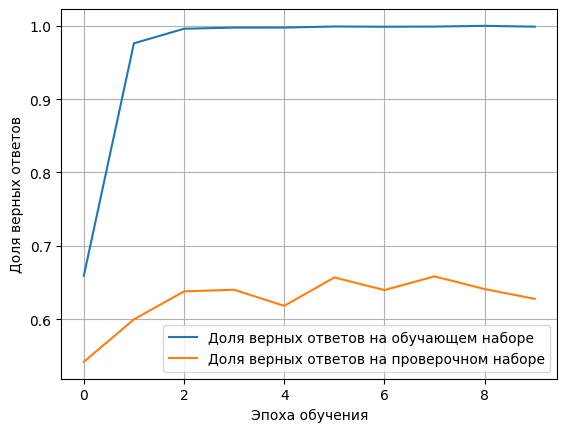

НЕЙРОННАЯ СЕТЬ:  Embedding + LSTM

16/16 [==============================] - 4s 249ms/step
Клиффорд_Саймак  распознано  64 % сеть считает, что это  Клиффорд_Саймак ,  распознано ВЕРНО!
62/62 [==============================] - 17s 270ms/step
Макс Фрай  распознано  70 % сеть считает, что это  Макс Фрай ,  распознано ВЕРНО!
42/42 [==============================] - 11s 251ms/step
Рэй Брэдберри  распознано  51 % сеть считает, что это  Рэй Брэдберри ,  распознано ВЕРНО!
42/42 [==============================] - 12s 283ms/step
Булгаков  распознано  43 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
34/34 [==============================] - 9s 253ms/step
Стругацкие  распознано  96 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
17/17 [==============================] - 5s 298ms/step
О. Генри  распознано  75 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!

Средний процент распознавания  65 %

Время обработки: 7123.52c


In [ ]:
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.0001
nEmbedding = 50

input_layer = Input(shape=(xLen, ))
LSTM_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
LSTM_2 = SpatialDropout1D(nDropout)(LSTM_1)
LSTM_3 = LSTM(xLen//10, return_sequences=True)(LSTM_2)
LSTM_4 = Flatten()(LSTM_3)
LSTM_5 = Dense(nDense, activation='softmax')(LSTM_4)

modelLSTM = Model(inputs=input_layer, outputs=LSTM_5)
modelLSTM.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])

# остановки обучения по условию
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 1,  restore_best_weights = True)

#Обучаем на xTrain
history = modelLSTM.fit(xTrain, yTrain, epochs=epochs, verbose = 1,
                             callbacks = early_stopping,
                             validation_data = (xTest, yTest))


plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelLSTM, xTest6Classes, "Embedding + LSTM") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время


In [ ]:
plot_model(modelLSTM, dpi=70)

Epoch 1/100
551/551 [==============================] - 678s 1s/step - loss: 0.9415 - accuracy: 0.6357 - val_loss: 1.5447 - val_accuracy: 0.5052
Epoch 2/100
551/551 [==============================] - 667s 1s/step - loss: 0.0980 - accuracy: 0.9785 - val_loss: 1.8642 - val_accuracy: 0.5576
Epoch 3/100
551/551 [==============================] - 627s 1s/step - loss: 0.0187 - accuracy: 0.9958 - val_loss: 2.6610 - val_accuracy: 0.5169
Epoch 4/100
551/551 [==============================] - 668s 1s/step - loss: 0.0105 - accuracy: 0.9976 - val_loss: 2.4653 - val_accuracy: 0.5697
Epoch 5/100
551/551 [==============================] - 665s 1s/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 2.6428 - val_accuracy: 0.5785
Epoch 6/100
551/551 [==============================] - 668s 1s/step - loss: 0.0077 - accuracy: 0.9981 - val_loss: 2.5509 - val_accuracy: 0.5861
Epoch 7/100
551/551 [==============================] - 626s 1s/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 2.8138 - val_accuracy:

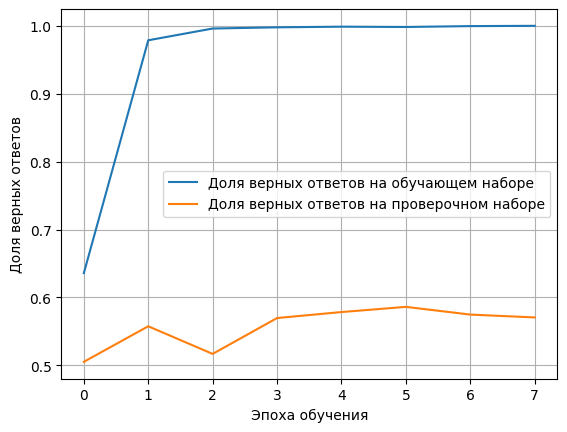

НЕЙРОННАЯ СЕТЬ:  Embedding + GRU

16/16 [==============================] - 5s 297ms/step
Клиффорд_Саймак  распознано  53 % сеть считает, что это  Клиффорд_Саймак ,  распознано ВЕРНО!
62/62 [==============================] - 12s 199ms/step
Макс Фрай  распознано  65 % сеть считает, что это  Макс Фрай ,  распознано ВЕРНО!
42/42 [==============================] - 10s 231ms/step
Рэй Брэдберри  распознано  58 % сеть считает, что это  Рэй Брэдберри ,  распознано ВЕРНО!
42/42 [==============================] - 8s 185ms/step
Булгаков  распознано  16 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
34/34 [==============================] - 8s 244ms/step
Стругацкие  распознано  92 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
17/17 [==============================] - 3s 181ms/step
О. Генри  распознано  75 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!

Средний процент распознавания  58 %

Время обработки: 5363.53c


In [ ]:
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.0001
nEmbedding = 50

input_layer = Input(shape=(xLen, ))
GRU_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
GRU_2 = SpatialDropout1D(nDropout)(GRU_1)
GRU_3 = GRU(xLen//10, return_sequences=True)(GRU_2)
GRU_4 = Flatten()(GRU_3)
GRU_5 = Dense(nDense, activation='softmax')(GRU_4)

modelGRU = Model(inputs=input_layer, outputs=GRU_5)
modelGRU.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])

# остановки обучения по условию
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 1,  restore_best_weights = True)

#Обучаем на xTrain
history = modelGRU.fit(xTrain, yTrain, epochs=epochs, verbose = 1,
                             callbacks = early_stopping,
                             validation_data = (xTest, yTest))


plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelGRU, xTest6Classes, "Embedding + GRU") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время


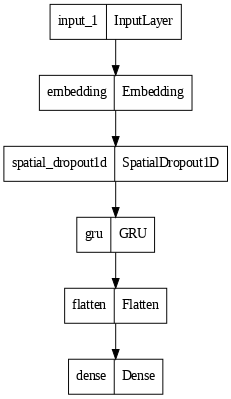

In [ ]:
plot_model(modelGRU, dpi=70)

  Результаты работы алгоритмов LSTM И GRU хуже чем просто Embedding.
  Слишком большое время работы, чтобы экспериментировать с параметрами.